In [2]:
from util.pred import multi_predictor as predictor
from cfg import *
import matplotlib.pyplot as plt
from util.processor import *
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (14,10)

Segmentation Models: using `keras` framework.


In [3]:
MODEL_PATH = './model/multi_100_deeplab_xception_pascal_voc_0930.hdf5'
MODEL = MODEL_PATH.split('/')[-1].split('_')[2]
if MODEL=='deeplab':
    WEIGHT='pascal_voc'
else:
    WEIGHT = MODEL_PATH.split('/')[-1].split('_')[4]
MAG = MODEL_PATH.split('/')[-1].split('_')[1]
BACKBONE = MODEL_PATH.split('/')[-1].split('_')[3]


init_params = {
    'MODEL':MODEL,
    'MODEL_PATH':MODEL_PATH,
    'BACKBONE':BACKBONE,
    'WEIGHT':WEIGHT,
    'MAG':int(MAG),
}

In [ ]:
wsi_p = predictor(init_params)

In [4]:
import cv2 as cv
import numpy as np
test_slide = TEST_SLIDE_PATHS[3]
test_anno = test_slide[:-4] + 'xml'
print(test_slide,test_anno)
sample_patches50 = []
tumors = 0; nerves = 0
for fpath in glob.glob(TEST_PATIENT_PATHS[0]+'patch_50_5/mask/*.png'):
    if (fpath.split('.')[0][-1]=='1'):
        tumors+=1
        sample_patches50.append(cv.imread(fpath.replace('mask','image').replace('_p1','')))
    elif (fpath.split('.')[0][-1]!='1'):
        print(fpath)
        nerves+=1
        sample_patches50.append(cv.imread(fpath.replace('mask','image').replace('_p2','').replace('_p3','')))
    if len(sample_patches50)==10:
        break
print(len(sample_patches50))

sample_patches100 = []
tumors = 0; nerves = 0
for fpath in glob.glob(TEST_PATIENT_PATHS[0]+'patch_100_5/mask/*.png'):
    if (fpath.split('.')[0][-1]=='1'):
        tumors+=1
        sample_patches100.append(cv.imread(fpath.replace('mask','image').replace('_p1','')))
    elif (fpath.split('.')[0][-1]!='1'):
        print(fpath)
        nerves+=1
        sample_patches100.append(cv.imread(fpath.replace('mask','image').replace('_p2','').replace('_p3','')))
    if len(sample_patches100)==10:
        break
print(len(sample_patches100))
        


#sample_patch = cv.imread('/data/colon/IS/S14-2674/patch50/image/28.png')

#sample_patch_input = np.expand_dims(sample_patch,0)

#a,b = wsi_p.predict_patch(sample_patch)

/data/colon/IS/S17-6609/s17-6609-a2_he_20210803_173533.tiff /data/colon/IS/S17-6609/s17-6609-a2_he_20210803_173533.xml
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_0_p3.png
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_1_p3.png
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_2_p2.png
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_3_p2.png
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_4_p2.png
/data/colon/IS/S15-2703/patch_50_5/mask/s2015-2703-a2_he_20210804_203043_5_p2.png
10
/data/colon/IS/S15-2703/patch_100_5/mask/s2015-2703-a2_he_20210804_203043_0_p3.png
/data/colon/IS/S15-2703/patch_100_5/mask/s2015-2703-a2_he_20210804_203043_1_p3.png
/data/colon/IS/S15-2703/patch_100_5/mask/s2015-2703-a2_he_20210804_203043_2_p3.png
/data/colon/IS/S15-2703/patch_100_5/mask/s2015-2703-a2_he_20210804_203043_3_p3.png
/data/colon/IS/S15-2703/patch_100_5/mask/s2015-2703-a2

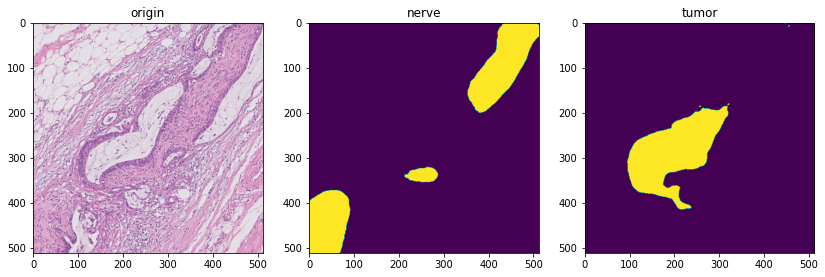

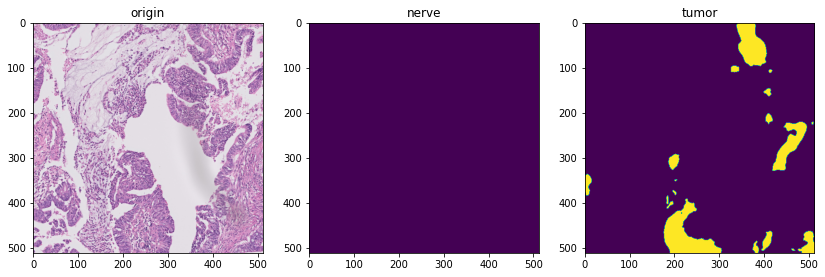

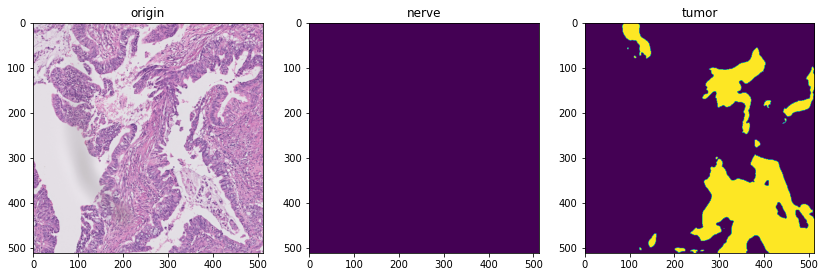

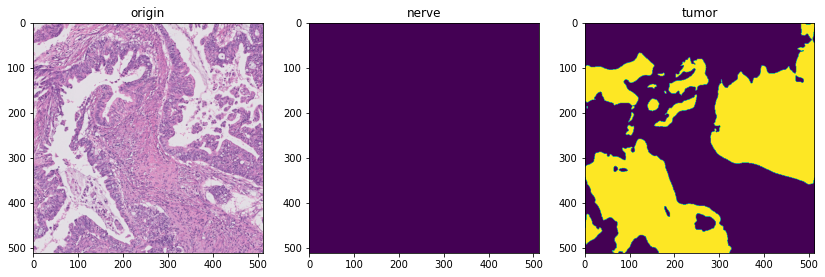

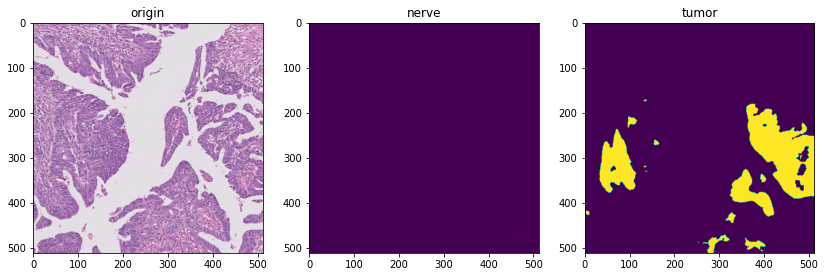

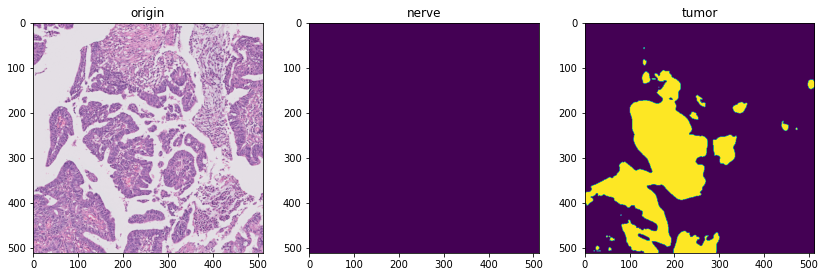

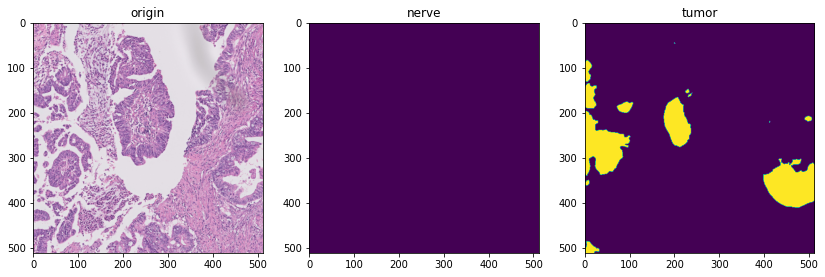

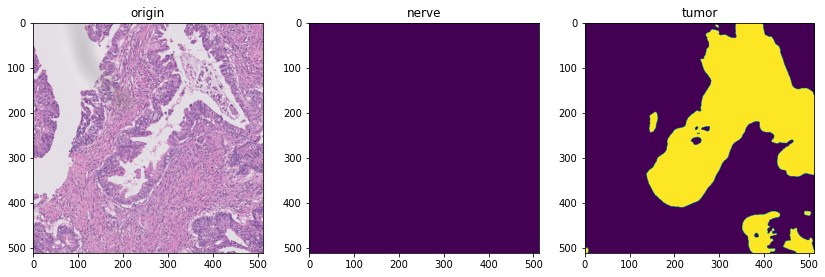

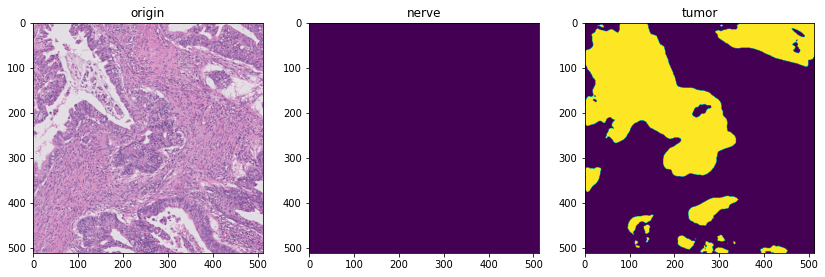

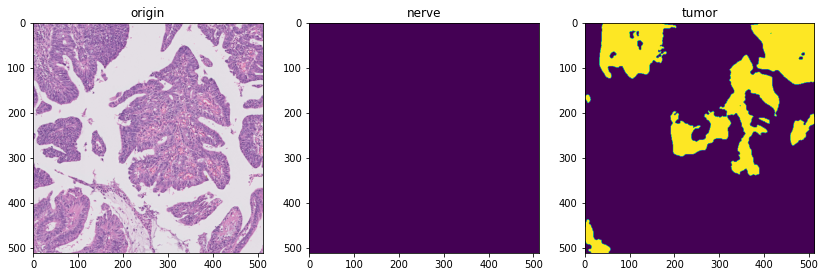

In [46]:
for  i in range(len(sample_patches50)):
    nerve_pr,tumor_pr = wsi_p.predict_patch(sample_patches50[i])
    plt.figure()
    plt.subplot(1,3,1); plt.title('origin'); plt.imshow(sample_patches50[i])
    plt.subplot(1,3,2); plt.title('nerve');plt.imshow(nerve_pr)
    plt.subplot(1,3,3); plt.title('tumor');plt.imshow(tumor_pr)

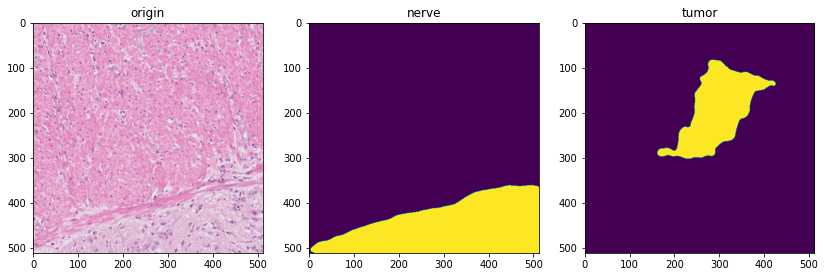

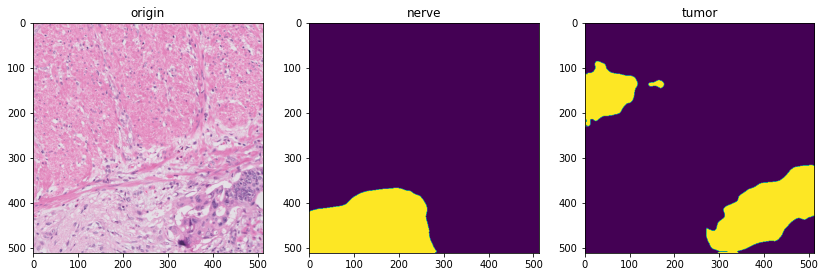

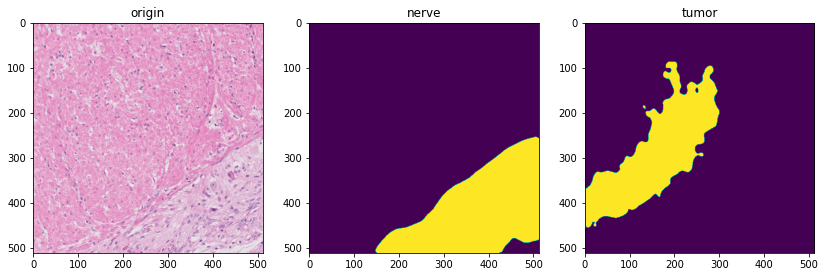

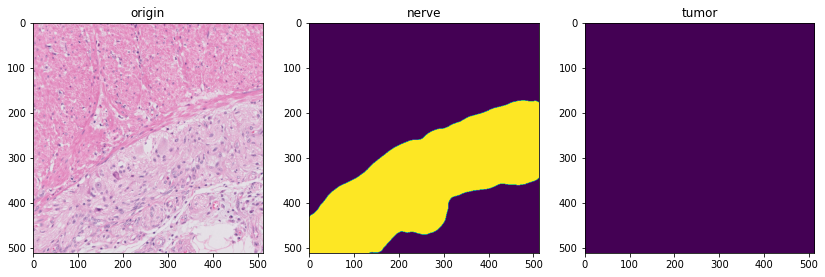

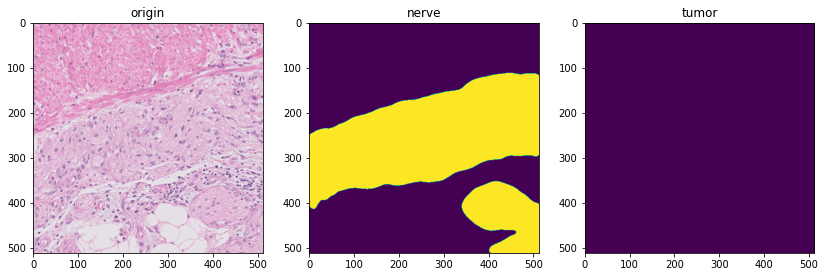

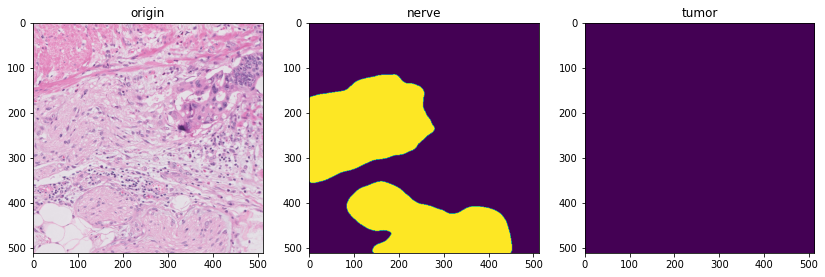

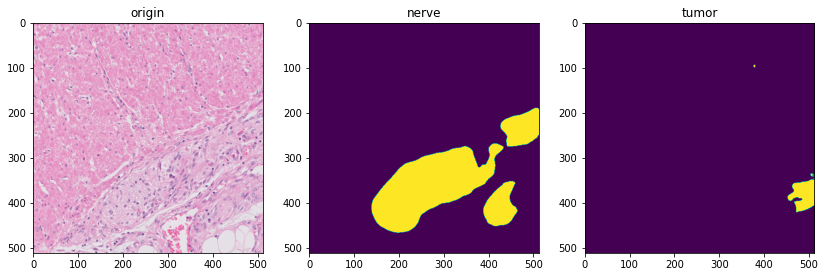

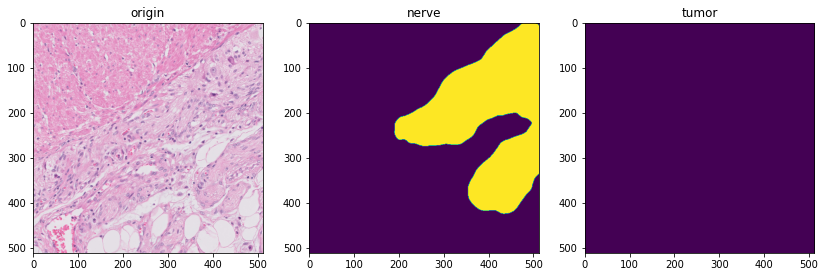

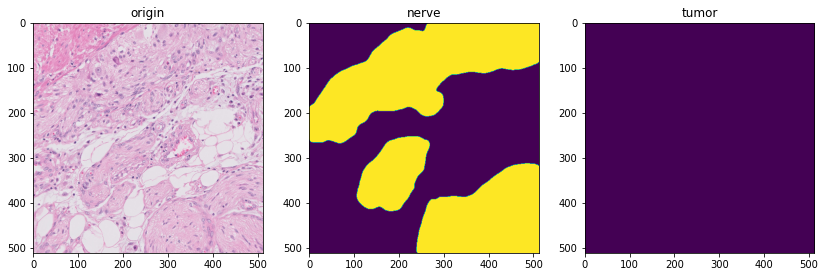

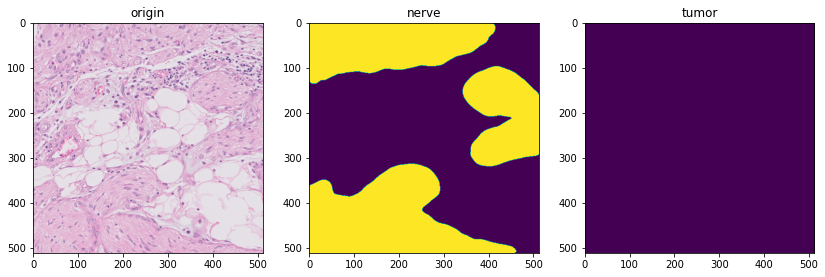

In [5]:
for  i in range(len(sample_patches100)):
    nerve_pr,tumor_pr = wsi_p.predict_patch(sample_patches100[i])
    plt.figure()
    plt.subplot(1,3,1); plt.title('origin'); plt.imshow(sample_patches100[i])
    plt.subplot(1,3,2); plt.title('nerve');plt.imshow(nerve_pr)
    plt.subplot(1,3,3); plt.title('tumor');plt.imshow(tumor_pr)

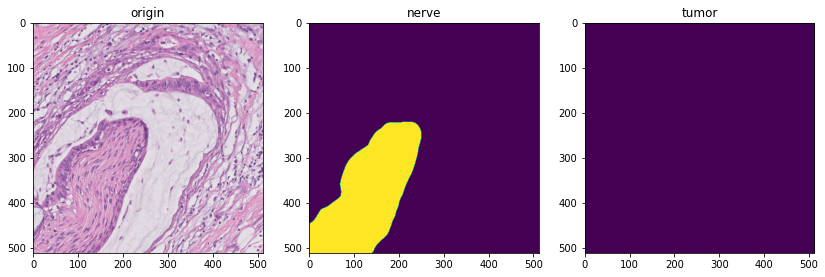

In [5]:
'/data/colon/IS/S16-2273/patch_100_5/mask/'
sample_patch = cv.imread('/data/colon/IS/S16-2273/patch_100_5/image/s16-2273-a5_he_20210802_121327_1.png') # p3
#sample_patch = cv.imread('/data/colon/IS/S14-5675/patch_50_5/image/s14-5675-a5_he_20210730_123932_41.png') # p2




a,b = wsi_p.predict_patch(sample_patch)
plt.figure()
plt.subplot(1,3,1); plt.title('origin'); plt.imshow(sample_patch)
plt.subplot(1,3,2); plt.title('nerve');plt.imshow(a)
plt.subplot(1,3,3); plt.title('tumor');plt.imshow(b)

In [ ]:
test_slide = TEST_SLIDE_PATHS[3]
test_anno = test_slide[:-4] + 'xml'
level = 4
print(test_slide,test_anno,level)

slide = slide_processor({
    'slide_path':test_slide,
    'xml_path':test_anno,
    'level':level,
    'patch_size':512,
    'patch_name':'patch100'
})

x = slide.get_annotation_dict()
## Show Tumor BBOX
for k in x['bboxes'].keys():
    print(f'{k} : {len(x["bboxes"][k])}')
    
    

In [ ]:
msk, prt = wsi_p.predict_regions(test_slide,test_anno,overlap=0.0,dilate_iter=2,level = level,kernel_size = 4)

In [6]:
cv.imwrite('/data/colon/IS/S14-327/multi_nonoverlap_deeplab.jpg',prt)

True

In [ ]:
bbox = x['bboxes']['p3'][0]
min_x,min_y = np.min(bbox,axis=0)
max_x,max_y = np.max(bbox,axis=0)
plt.figure(figsize = (18,14))
plt.imshow(prt[min_y:max_y,min_x:max_x])

# Legend
pni_pred_c   = mpatches.Patch(edgecolor = (0,1,1,1),facecolor= (0,1,1,1), label = 'PNI pred'); 
pni_real_c   = mpatches.Patch(edgecolor = (0,1,0,1),facecolor= (0,1,0,1), label = 'PNI real')
nerve_pred_c = mpatches.Patch(edgecolor = (1,0,1,1),facecolor= (1,0,1,1), label = 'Nerve pred'); 
nerve_real_c = mpatches.Patch(edgecolor = (0,0,1,1),facecolor= (0,0,1,1), label = 'Nerve real')
tumor_pred_c = mpatches.Patch(edgecolor = (1,1,0,1),facecolor= (1,1,0,1), label = 'Tumor pred');
tumor_real_c = mpatches.Patch(edgecolor = (1,0,0,1),facecolor= (1,0,0,1), label = 'Tumor real')
legends = [pni_pred_c,pni_real_c,nerve_pred_c,nerve_real_c,tumor_pred_c,tumor_real_c]


plt.legend(handles=legends, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20 ,edgecolor='inherit')

----

In [8]:
cfm = wsi_p.eval_regions(test_slide,test_anno,overlap=0.0,dilate_iter=2,level = level,kernel_size = 4)

100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


In [9]:
cfm

(0, 0, 1, 6)

In [10]:
import os
tp = 0; fp = 0; fn =0; tn = 0
for slide_path in TEST_SLIDE_PATHS:
    xml_path = slide_path.split('.')[0] + '.xml'
    if os.path.exists(xml_path):
        cfm = wsi_p.eval_regions(slide_path,xml_path,overlap=0.0,dilate_iter=2,level = 4,kernel_size = 4)
        tp+=cfm[0]; fp+= cfm[1]; fn+= cfm[2]; tn+=cfm[3]
    else:
        continue
print(f'\nTrue Positive : {tp}\nFalse Positive : {fp}\nFalse Negative : {fn}\nTrue Negative : {tn} ')

100%|██████████| 3/3 [00:04<00:00,  1.56s/it]



True Positive : 1
False Positive : 5
False Negative : 9
True Negative : 42 


In [11]:
import seaborn as sns

In [12]:
np.array([[tp,fp],[fn,tn]])

array([[ 1,  5],
       [ 9, 42]])

In [13]:
sns.set_context(font_scale=2)

Accuracy : 0.754
Precision(PPV) : 0.167
Recall : 0.100
Sensitivity : 0.167
Specficity : 0.824


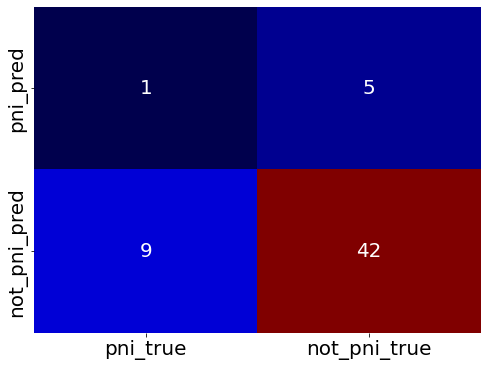

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(np.array(((tp,fp),(fn,tn))),annot=True,cmap='seismic',fmt='d',cbar=False,annot_kws={'size':20},
            xticklabels=['pni_true','not_pni_true'],
            yticklabels=['pni_pred','not_pni_pred'],
           )


plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
acc = (tp+tn)/(tp+tn+fp+fn)
prec = tp/(tp+fp)
recl = tp/(tp+fn)
sens = tp/(tp+fp)
spec = tn/(tn+fn)
print(f'Accuracy : {acc:.3f}')
print(f'Precision(PPV) : {prec:.3f}')
print(f'Recall : {recl:.3f}')
print(f'Sensitivity : {sens:.3f}')
print(f'Specficity : {spec:.3f}')